In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Read the data set into python 

In [39]:
df = pd.read_csv('StudentsPerformance.csv')

In [40]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.


In [41]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
#482 males and 518 females partcipated in the test

# 2. What do you think about the students' parental level of education?


In [74]:
edu=df['parental level of education'].value_counts()
edu

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

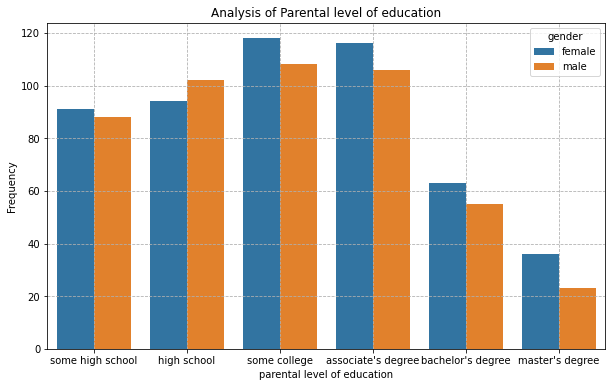

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['parental level of education'],data=df,hue ='gender')
plt.title("Analysis of Parental level of education")
plt.ylabel('Frequency')
plt.grid(linestyle='--')
plt.show()

# 3. Who scores the most on average for math, reading and writing based on


# ● Gender


In [23]:
avg=df.groupby('gender')[['math score','reading score','writing score']].mean()
avg

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [ ]:
# Males score the most for maths, where as females score the most for reading and writing.

# ● Test preparation course


In [24]:
course=df.groupby('test preparation course')[['math score','reading score','writing score']].mean()
course

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [ ]:
#Those who have completed the test preparation course have scored the most for maths,reading and writing.

# 4. What do you think about the scoring variation for math, reading and writing based on


# ● Gender


In [26]:
score_var=df.groupby('gender')[['math score','reading score','writing score']].std()
score_var

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [ ]:
#The scoring variation for maths,reading and writing is high for females.

In [ ]:
# Box plot of

plt.figure(figsize=(20,20))
sns.boxplot(x='',y='Gender',data=df)
plt.title('Box plot of Region Vs GDP',fontsize=25,weight='bold')
plt.tight_layout()

# ● Test preparation course


In [27]:
course=df.groupby('test preparation course')[['math score','reading score','writing score']].std()
course

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [ ]:
#The scoring variation is high for those who haven't completed the test preparation course.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.



In [34]:
tot=df['gender'].value_counts().sum()
tot

1000

In [ ]:
# There are total number of 1000 students

In [55]:
top_stud=df.nlargest(250,['math score'])
top_stud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


<Figure size 1440x1440 with 0 Axes>

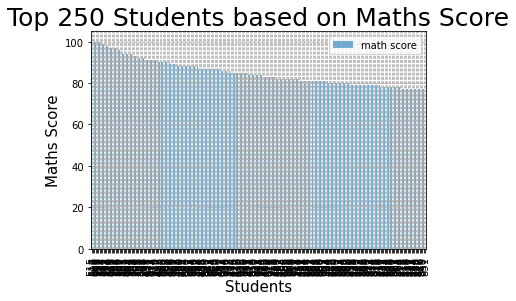

In [66]:
plt.figure(figsize=(20,20))
top_stud.plot(y='math score',kind='bar',alpha=.6)
plt.xlabel("Students",fontsize=15)
plt.ylabel("Maths Score",fontsize=15)
plt.title("Top 250 Students based on Maths Score",fontsize=25)
plt.xticks(rotation=90)
plt.grid(linestyle="--")
plt.show()

In [68]:
top = df[df['math score']>=df['math score'].quantile(q=0.75)]
top.sort_values(by='math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
517,female,group E,associate's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77
415,female,group B,master's degree,free/reduced,completed,77,97,94
